# 1. 나라장터 데이터

https://www.g2b.go.kr:8101/ep/tbid/tbidList.do?searchType=1&bidSearchType=1&taskClCds=5&bidNm=%B5%F0%C1%F6%C5%D0&searchDtType=1&fromBidDt=2020%2F04%2F20&toBidDt=2020%2F10%2F19&fromOpenBidDt=&toOpenBidDt=&radOrgan=2&instNm=%B1%B3%C0%B0&instSearchRangeType=&refNo=&area=&areaNm=&strArea=&orgArea=&industry=&industryCd=&upBudget=&downBudget=&budgetCompare=&detailPrdnmNo=&detailPrdnm=&procmntReqNo=&intbidYn=&regYn=Y&recordCountPerPage=100

Google Spreadsheet으로 크롤링 후 csv 파일로 저장

In [2]:
import pandas as pd

df = pd.read_csv("crawled_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   공고번호-차수        376 non-null    object
 1   공고명            376 non-null    object
 2   수요기관           376 non-null    object
 3   입력일시
(입찰마감일시)  376 non-null    object
dtypes: object(4)
memory usage: 11.9+ KB


In [4]:
import re

df

,공고번호-차수,공고명,수요기관,입력일시\n(입찰마감일시)
0,20240432327-00,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024/04/19 14:55\n(2024/04/29 10:00)
1,20240421364-02,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024/04/17 17:44\n(-)
2,20240427845-00,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024/04/17 15:44\n(2024/04/29 15:00)
3,20240427288-00,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024/04/17 14:31\n(2024/05/28 10:00)
4,20240427759-00,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024/04/17 14:30\n(2024/05/28 10:00)
...,...,...,...,...
371,20200534133-00,중학교 사회·과학 디지털교과서 연계 교과융합형·심화형 실감형콘텐츠 개발,한국교육학술정보원,2020/06/01 16:01\n(2020/06/16 10:00)
372,20200533118-00,2020년 교육부 디지털 정책홍보 활성화 사업 계약,교육부,2020/05/26 17:56\n(2020/05/27 14:00)
373,20200526444-00,"군자디지털과학고 교사동(1,3,4동) 내진성능평가 용역",경기도교육청 경기도시흥교육지원청,2020/05/21 14:27\n(2020/05/29 10:00)
374,20200519514-00,2020년 방송중·고 디지털 학습 콘텐츠 개발 및 유지관리 사업,한국교육개발원,2020/05/18 17:10\n(2020/06/09 14:00)


## 1. 공고번호, 차수 나누어 정제하고 공고번호 인덱스로 만들기

In [5]:
df['공고번호-차수'] = df['공고번호-차수'].apply(lambda x: re.findall(r'[0-9]+', x))

In [6]:
df['공고번호-차수'].apply(lambda x: len(x) == 2).value_counts()

공고번호-차수
True     375
False      1
Name: count, dtype: int64

In [7]:
df['공고번호'] = df['공고번호-차수'].apply(lambda x: x[0])

In [8]:
df['차수'] = df['공고번호-차수'].apply(lambda x: x[1])

In [9]:
len(df['공고번호'].unique()) == len(df['공고번호'])

# 공고번호 유니크 확인

True

In [10]:
# 기존 '공고번호-차수' 컬럼 삭제, 공고번호 인덱스 만들기
df.drop('공고번호-차수', inplace = True, axis = 1)
df.set_index('공고번호', inplace = True)

df

,공고명,수요기관,입력일시\n(입찰마감일시),차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024/04/19 14:55\n(2024/04/29 10:00),00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024/04/17 17:44\n(-),02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024/04/17 15:44\n(2024/04/29 15:00),00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024/04/17 14:31\n(2024/05/28 10:00),00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024/04/17 14:30\n(2024/05/28 10:00),00
...,...,...,...,...
20200534133,중학교 사회·과학 디지털교과서 연계 교과융합형·심화형 실감형콘텐츠 개발,한국교육학술정보원,2020/06/01 16:01\n(2020/06/16 10:00),00
20200533118,2020년 교육부 디지털 정책홍보 활성화 사업 계약,교육부,2020/05/26 17:56\n(2020/05/27 14:00),00
20200526444,"군자디지털과학고 교사동(1,3,4동) 내진성능평가 용역",경기도교육청 경기도시흥교육지원청,2020/05/21 14:27\n(2020/05/29 10:00),00


## 2. 입력일시 컬럼명 깔끔하게 만들고 속성 데이트타임으로 변경하기

In [11]:
df['입력일시\n(입찰마감일시)'] = df['입력일시\n(입찰마감일시)'].apply(lambda x: re.findall(r'^.*?(?=\n)', x)[0])

In [12]:
df.head()

,공고명,수요기관,입력일시\n(입찰마감일시),차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024/04/19 14:55,00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024/04/17 17:44,02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024/04/17 15:44,00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024/04/17 14:31,00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024/04/17 14:30,00


In [13]:
df['입력일시\n(입찰마감일시)'] = pd.to_datetime(df['입력일시\n(입찰마감일시)'])

In [14]:
df.head()

,공고명,수요기관,입력일시\n(입찰마감일시),차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00


In [15]:
df.rename(columns = {'입력일시\n(입찰마감일시)' : '일시'}, inplace = True)

df.head()

,공고명,수요기관,일시,차수
공고번호,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00


## 3. 키워드 컬럼 만들기

### (1) keyword 1. 교과서 (코스웨어)

In [16]:
keyword = '교과서'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    320
True      56
Name: count, dtype: int64

In [17]:
df['교과서 키워드'] = df['공고명'].str.contains(keyword)

df.head()

,공고명,수요기관,일시,차수,교과서 키워드
공고번호,,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00,True
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02,False
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00,False
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00,False
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00,False


### (2) keyword 2. 콘텐츠

In [18]:
keyword = '콘텐츠'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    330
True      46
Name: count, dtype: int64

In [19]:
df['콘텐츠 키워드'] = df['공고명'].str.contains(keyword)

df.head()

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드
공고번호,,,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00,True,False
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02,False,False
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00,False,False
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00,False,True
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00,False,True


### (3) keyword 3. 플랫폼

In [20]:
keyword = '플랫폼'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    349
True      27
Name: count, dtype: int64

In [21]:
df['플랫폼 키워드'] = df['공고명'].str.contains(keyword)

df.iloc[160:165]

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드,플랫폼 키워드
공고번호,,,,,,,
20230614440,2023년 디지털튜터 지원 사업,서울특별시교육청,2023-06-12 17:39:00,00,False,False,False
20230609880,(긴급)2023년 디지털 러닝 페스티벌 행사 용역,서울특별시교육청,2023-06-08 16:45:00,00,False,False,False
20230607689,"2023년 초,중학생 디지털 리터러시 수행형 평가도구 개선 및 수준 측정 연구",한국교육학술정보원,2023-06-07 15:02:00,00,False,False,False
20230607839,교원 전용 디지털콘텐츠 플랫폼 잇다 교원 성장 프로젝트 연수 개발 및 운영,한국교육학술정보원,2023-06-07 15:00:00,00,False,True,True
20230607578,2023년 초중등학교 디지털 전환 지표 개발 및 실태조사,한국교육학술정보원,2023-06-07 14:31:00,00,False,False,False


### (4) keyword 4. 이러닝

In [22]:
keyword = '이러닝'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    366
True      10
Name: count, dtype: int64

In [23]:
df['이러닝 키워드'] = df['공고명'].str.contains(keyword)

df.tail()

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드,플랫폼 키워드,이러닝 키워드
공고번호,,,,,,,,
20200534133,중학교 사회·과학 디지털교과서 연계 교과융합형·심화형 실감형콘텐츠 개발,한국교육학술정보원,2020-06-01 16:01:00,00,True,True,False,False
20200533118,2020년 교육부 디지털 정책홍보 활성화 사업 계약,교육부,2020-05-26 17:56:00,00,False,False,False,False
20200526444,"군자디지털과학고 교사동(1,3,4동) 내진성능평가 용역",경기도교육청 경기도시흥교육지원청,2020-05-21 14:27:00,00,False,False,False,False
20200519514,2020년 방송중·고 디지털 학습 콘텐츠 개발 및 유지관리 사업,한국교육개발원,2020-05-18 17:10:00,00,False,True,False,False
20200516075,2020년 중요기록물 디지털화 사업 용역,인천광역시교육청,2020-05-14 17:01:00,00,False,False,False,False


### (5) keyword 4. AI

In [24]:
keyword = 'AI'

df['공고명'].str.contains(keyword).value_counts()

공고명
False    340
True      36
Name: count, dtype: int64

In [25]:
df['AI 키워드'] = df['공고명'].str.contains(keyword)

df.head()

,공고명,수요기관,일시,차수,교과서 키워드,콘텐츠 키워드,플랫폼 키워드,이러닝 키워드,AI 키워드
공고번호,,,,,,,,,
20240432327,2024년 AI디지털교과서(코스웨어) 직무연수 위탁 운영 용역 공고,인천광역시교육청 인천광역시교육청교육과학정보원,2024-04-19 14:55:00,00,True,False,False,False,True
20240421364,APEC 디지털 교육 정책 포럼 행사 대행,(사)에이펙국제교육협력원,2024-04-17 17:44:00,02,False,False,False,False,False
20240427845,2024년 디지털 기반 수업혁신 교원역량강화 직무연수 위탁 운영,강원특별자치도교육청 강원특별자치도교육청교육연수원,2024-04-17 15:44:00,00,False,False,False,False,False
20240427288,2024년도 이러닝 콘텐츠 개발(디지털 신기술 1차),한국기술교육대학교,2024-04-17 14:31:00,00,False,True,False,True,False
20240427759,2024년도 이러닝 콘텐츠 개발(디지털 신기술 2차),한국기술교육대학교,2024-04-17 14:30:00,00,False,True,False,True,False


### 키워드 5개 한 눈에 보기

In [26]:
df[['교과서 키워드', '콘텐츠 키워드', '플랫폼 키워드', '이러닝 키워드', 'AI 키워드']].head(10)

,교과서 키워드,콘텐츠 키워드,플랫폼 키워드,이러닝 키워드,AI 키워드
공고번호,,,,,
20240432327,True,False,False,False,True
20240421364,False,False,False,False,False
20240427845,False,False,False,False,False
20240427288,False,True,False,True,False
20240427759,False,True,False,True,False
20240425906,False,False,False,False,False
20240425533,True,False,False,False,True
20240414333,True,False,False,False,True
20240418097,False,False,False,False,False


### df 테이블 저장

## 4. 키워드 시각화

In [27]:
df.to_csv("preprocessed.csv")

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [44]:
plt.style.use( 'fivethirtyeight')

In [32]:
df[['교과서 키워드', '콘텐츠 키워드', '플랫폼 키워드', '이러닝 키워드', 'AI 키워드']].sum()

교과서 키워드    56
콘텐츠 키워드    46
플랫폼 키워드    27
이러닝 키워드    10
AI 키워드     36
dtype: int64

In [33]:
keywords_df = df[['교과서 키워드', '콘텐츠 키워드', '플랫폼 키워드', '이러닝 키워드', 'AI 키워드']].sum().sort_values(ascending = False)

In [34]:
keywords_df

교과서 키워드    56
콘텐츠 키워드    46
AI 키워드     36
플랫폼 키워드    27
이러닝 키워드    10
dtype: int64

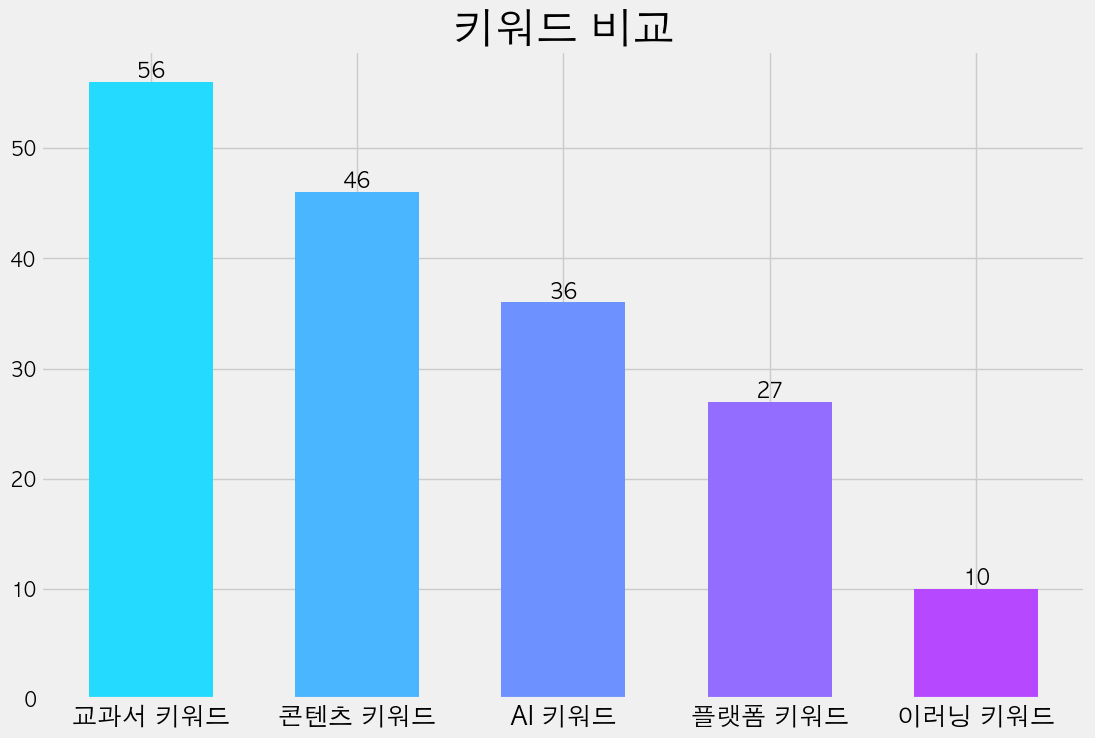

In [62]:
plt.figure(figsize = (12, 8))

colors = sns.color_palette('cool')
bars = plt.bar(keywords_df.index , keywords_df, color = colors, width = 0.6)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize = 15)

plt.title("키워드 비교", fontsize = 30)
plt.xticks(fontsize=18)
plt.savefig("keywords_edit.png", format="png")
plt.show()

# 2. 코스웨어 서비스 50개 데이터 분석 (2023.06)

In [6]:
import pandas as pd

data = pd.read_csv("courseware_data.csv")

In [10]:
data.head(3)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소3.1,가격
0,1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 예체능","초등학교, 중학교, 고등학교",x,o,x,x,"200,000/1인당"
1,2,(주)미네르바 에듀,교육용SW (꾸럼e),"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 비교과(상담/ 진로/체험 등)","초등학교, 중학교, 고등학교, 대학교",x,x,x,o,"프리미엄기준, 1년 100명 이용시 1인당 월 2,000원"
2,3,(주)코더블,코짐 (CoGym),정보/기술/실과,"초등학교, 중학교, 고등학교, 대학교",o,o,o,o,"베이직(6,600(월,\n 인당)),\n 프로(11,000(월,\n 인당))"


In [14]:
data.rename(columns = {"핵심요소3.1" : "핵심요소4"}, inplace = True)

In [15]:
data.head(3)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소4,가격
0,1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 예체능","초등학교, 중학교, 고등학교",x,o,x,x,"200,000/1인당"
1,2,(주)미네르바 에듀,교육용SW (꾸럼e),"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 비교과(상담/ 진로/체험 등)","초등학교, 중학교, 고등학교, 대학교",x,x,x,o,"프리미엄기준, 1년 100명 이용시 1인당 월 2,000원"
2,3,(주)코더블,코짐 (CoGym),정보/기술/실과,"초등학교, 중학교, 고등학교, 대학교",o,o,o,o,"베이직(6,600(월,\n 인당)),\n 프로(11,000(월,\n 인당))"


In [19]:
data['핵심요소1'].replace(['o', 'x'], [True, False], inplace=True)

In [20]:
data.head(3)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소4,가격
0,1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 예체능","초등학교, 중학교, 고등학교",False,o,x,x,"200,000/1인당"
1,2,(주)미네르바 에듀,교육용SW (꾸럼e),"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 비교과(상담/ 진로/체험 등)","초등학교, 중학교, 고등학교, 대학교",False,x,x,o,"프리미엄기준, 1년 100명 이용시 1인당 월 2,000원"
2,3,(주)코더블,코짐 (CoGym),정보/기술/실과,"초등학교, 중학교, 고등학교, 대학교",True,o,o,o,"베이직(6,600(월,\n 인당)),\n 프로(11,000(월,\n 인당))"


In [21]:
data['핵심요소2'].replace(['o', 'x'], [True, False], inplace=True)
data['핵심요소3'].replace(['o', 'x'], [True, False], inplace=True)
data['핵심요소4'].replace(['o', 'x'], [True, False], inplace=True)

In [22]:
data.head(3)

,연 번,기업명,서비스명,과목,적용학교급,핵심요소1,핵심요소2,핵심요소3,핵심요소4,가격
0,1,(주)메이커스 테크놀로지,AI\n 프로그래밍 교육 S/W,"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 예체능","초등학교, 중학교, 고등학교",False,True,False,False,"200,000/1인당"
1,2,(주)미네르바 에듀,교육용SW (꾸럼e),"국어, 영어,\n 수학, 사회, 과학, 정보/기술/실과, 비교과(상담/ 진로/체험 등)","초등학교, 중학교, 고등학교, 대학교",False,False,False,True,"프리미엄기준, 1년 100명 이용시 1인당 월 2,000원"
2,3,(주)코더블,코짐 (CoGym),정보/기술/실과,"초등학교, 중학교, 고등학교, 대학교",True,True,True,True,"베이직(6,600(월,\n 인당)),\n 프로(11,000(월,\n 인당))"


In [33]:
points = data[['핵심요소1','핵심요소2','핵심요소3','핵심요소4']].sum().sort_values(ascending = False)
points

핵심요소1    44
핵심요소4    39
핵심요소2    37
핵심요소3    37
dtype: int64

In [35]:
import matplotlib.pyplot as plt

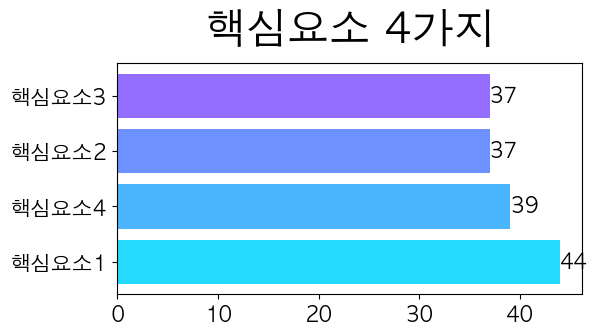

In [48]:
plt.figure(figsize = (6, 3))
plt.rcParams['font.family'] = 'AppleGothic'

colors = sns.color_palette('cool')
bars = plt.barh(y=points.index, width=points, color=colors)  # Using plt.barh() for horizontal bars
for bar in bars:
    xval = bar.get_width()  # Getting the width instead of height for horizontal bars
    yval = bar.get_y() + bar.get_height() / 2  # Getting the y-coordinate at the center of the bar
    plt.text(xval, yval, round(xval, 2), 
             ha='left', va='center', fontsize=15)

plt.title("핵심요소 4가지", fontsize=30, pad = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [49]:
points

핵심요소1    44
핵심요소4    39
핵심요소2    37
핵심요소3    37
dtype: int64

In [59]:
points.rename(index = {'핵심요소1' : '데이터분석기능', 
                       '핵심요소2':'AI 튜터기능', 
                       '핵심요소3':'학생용대시보드', 
                       '핵심요소4':'교사용대시보드'}, 
              inplace = True)

In [62]:
points.sort_values(inplace = True)

points

AI 튜터기능    37
학생용대시보드    37
교사용대시보드    39
데이터분석기능    44
dtype: int64

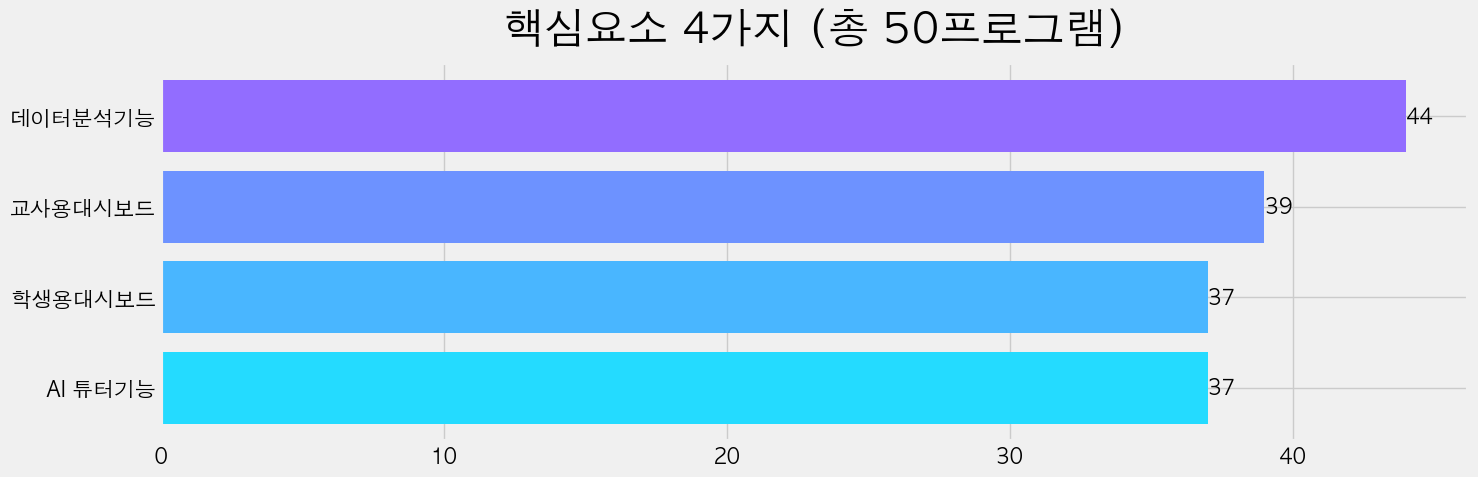

In [74]:
plt.style.use( 'fivethirtyeight')
plt.figure(figsize = (15, 5))
plt.rcParams['font.family'] = 'AppleGothic'

colors = sns.color_palette('cool')
bars = plt.barh(y=points.index, width=points, color=colors)  # Using plt.barh() for horizontal bars
for bar in bars:
    xval = bar.get_width()  # Getting the width instead of height for horizontal bars
    yval = bar.get_y() + bar.get_height() / 2  # Getting the y-coordinate at the center of the bar
    plt.text(xval, yval, round(xval, 2), 
             ha='left', va='center', fontsize=15)

plt.title("핵심요소 4가지 (총 50프로그램)", fontsize=30, pad = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("4points.png", format="png")

plt.show()

# 3. 코스웨어 서비스 2024 144개 데이터 분석 (2024.04)